## 각 데이터에 대한 데이터 평균 정보 구하기

* CICI Format의 전체 데이터
* UNSW Format의 전체 데이터
* CICI Format의 Normal 데이터
* UNSW Format의 Normal 데이터
* CICI Format의 Malicious 데이터
* UNSW Format의 Malicious 데이터

In [2]:
import pandas as pd

In [54]:
ConcatedCICI = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/Dataset/MLAC-dataset/encodedwithdlabel_ConcatedCICI.csv')
ConcatedUNSW = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/Dataset/MLAC-dataset/encodedwithdlabel_ConcatedUNSW.csv')

In [55]:
del ConcatedCICI['Unnamed: 0']
del ConcatedUNSW['Unnamed: 0']

In [38]:
ConcatedUNSW['dlabel'].value_counts()

1.0    2540041
0.0    2391551
Name: dlabel, dtype: int64

In [14]:
ConcatedCICI.describe().to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/describe/ConcatedCICI_full.csv', index=False)

In [15]:
ConcatedUNSW.describe().to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/describe/ConcatedUNSW_full.csv', index=False)

In [56]:
ConcatedCICI_B = ConcatedCICI[ConcatedCICI['label']==0]
ConcatedCICI_M = ConcatedCICI[ConcatedCICI['label']==1]

In [19]:
ConcatedCICI_B.describe().to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/describe/ConcatedCICI_B.csv', index=False)
ConcatedCICI_M.describe().to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/describe/ConcatedCICI_M.csv', index=False)

In [57]:
ConcatedUNSW_B = ConcatedUNSW[ConcatedUNSW['label']==0]
ConcatedUNSW_M = ConcatedUNSW[ConcatedUNSW['label']==1]

In [21]:
ConcatedUNSW_B.describe().to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/describe/ConcatedUNSW_B.csv', index=False)
ConcatedUNSW_M.describe().to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/describe/ConcatedUNSW_M.csv', index=False)

❗ 모든 Attack Category에 대한 정보도 구해볼까?

## CICI VS UNSW Feature Selection

* Benign + Malicious
* Benign
* Malicious

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import classification_util as util

### CICI

Elapsed time to compute the importances: 0.019 seconds


Text(0.5, 1.0, 'CICIDS2017 Format Full Data Random Forest Decision')

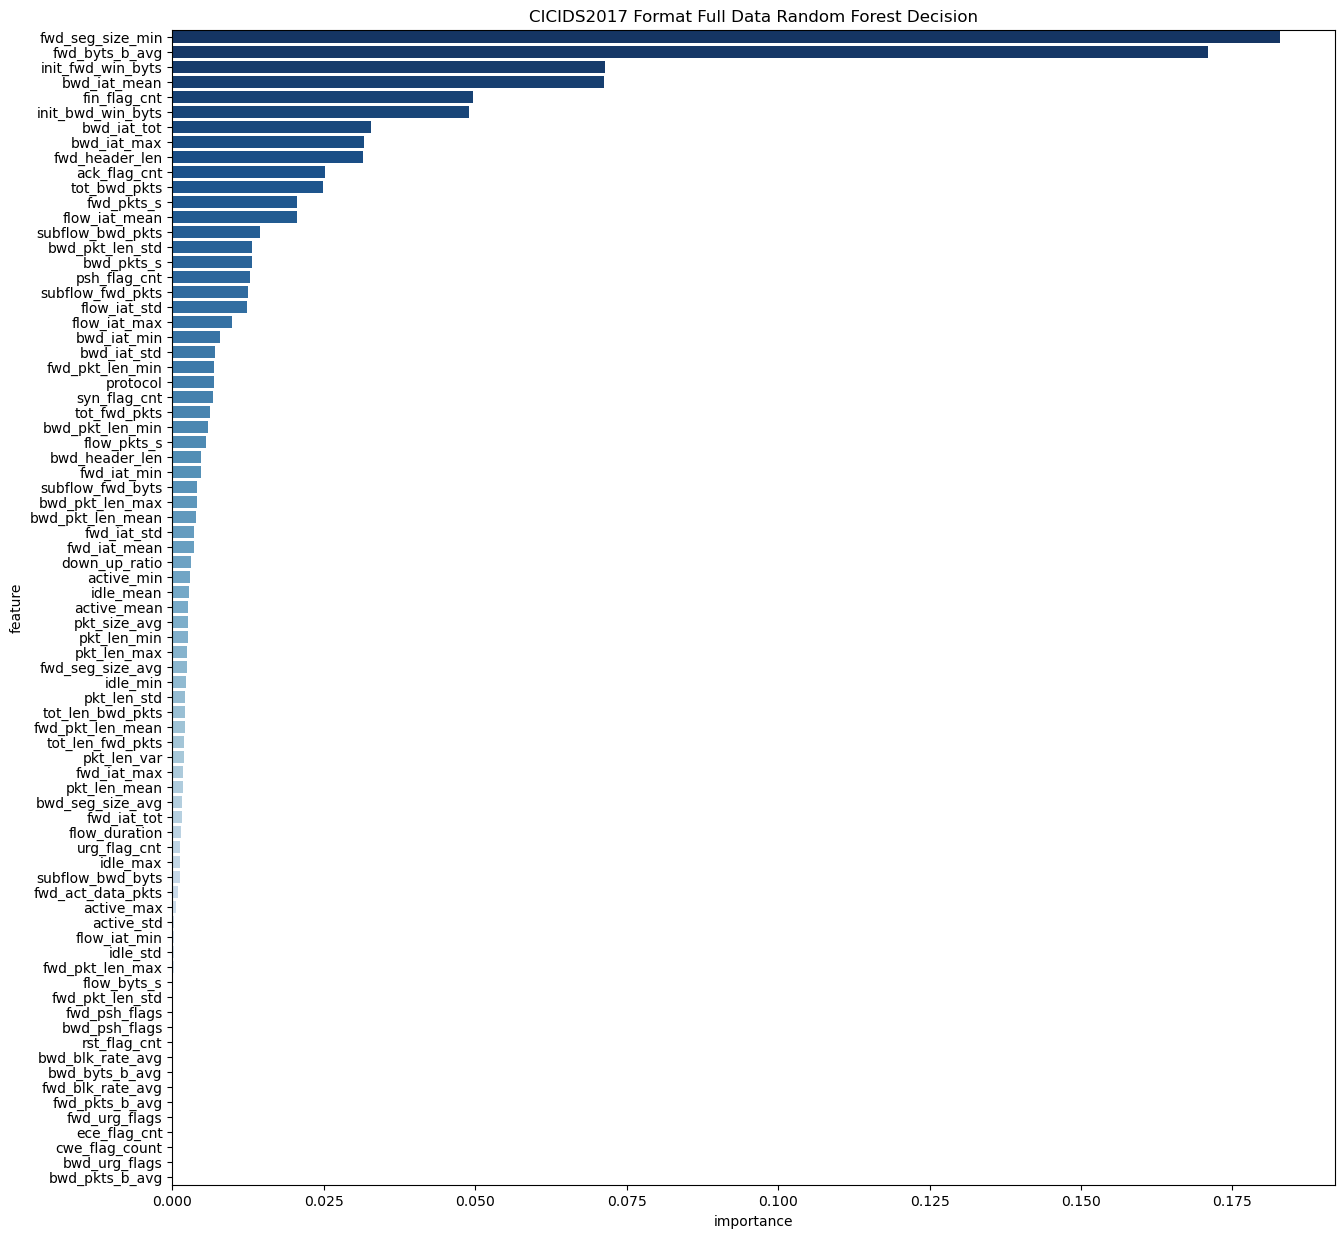

In [27]:
# Full CICI

#del ConcatedCICI['label']
#del ConcatedCICI['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedCICI)
col = list(X_train.columns)

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

import time
import numpy as np
import seaborn as sns

start_time = time.time()
importances = rforest.feature_importances_
fi = list(importances)
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

import pandas as pd

rforest_importances = pd.Series(importances, index=feature_names)

zipp  = []
for zipper in zip(col, fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='Blues_r')
plt.title("CICIDS2017 Format Full Data Random Forest Decision")

In [30]:
zipp.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedCICI.csv')

train finished
Elapsed time to compute the importances: 0.009 seconds


Text(0.5, 1.0, 'ConcatedCICI_M Random Forest Decision')

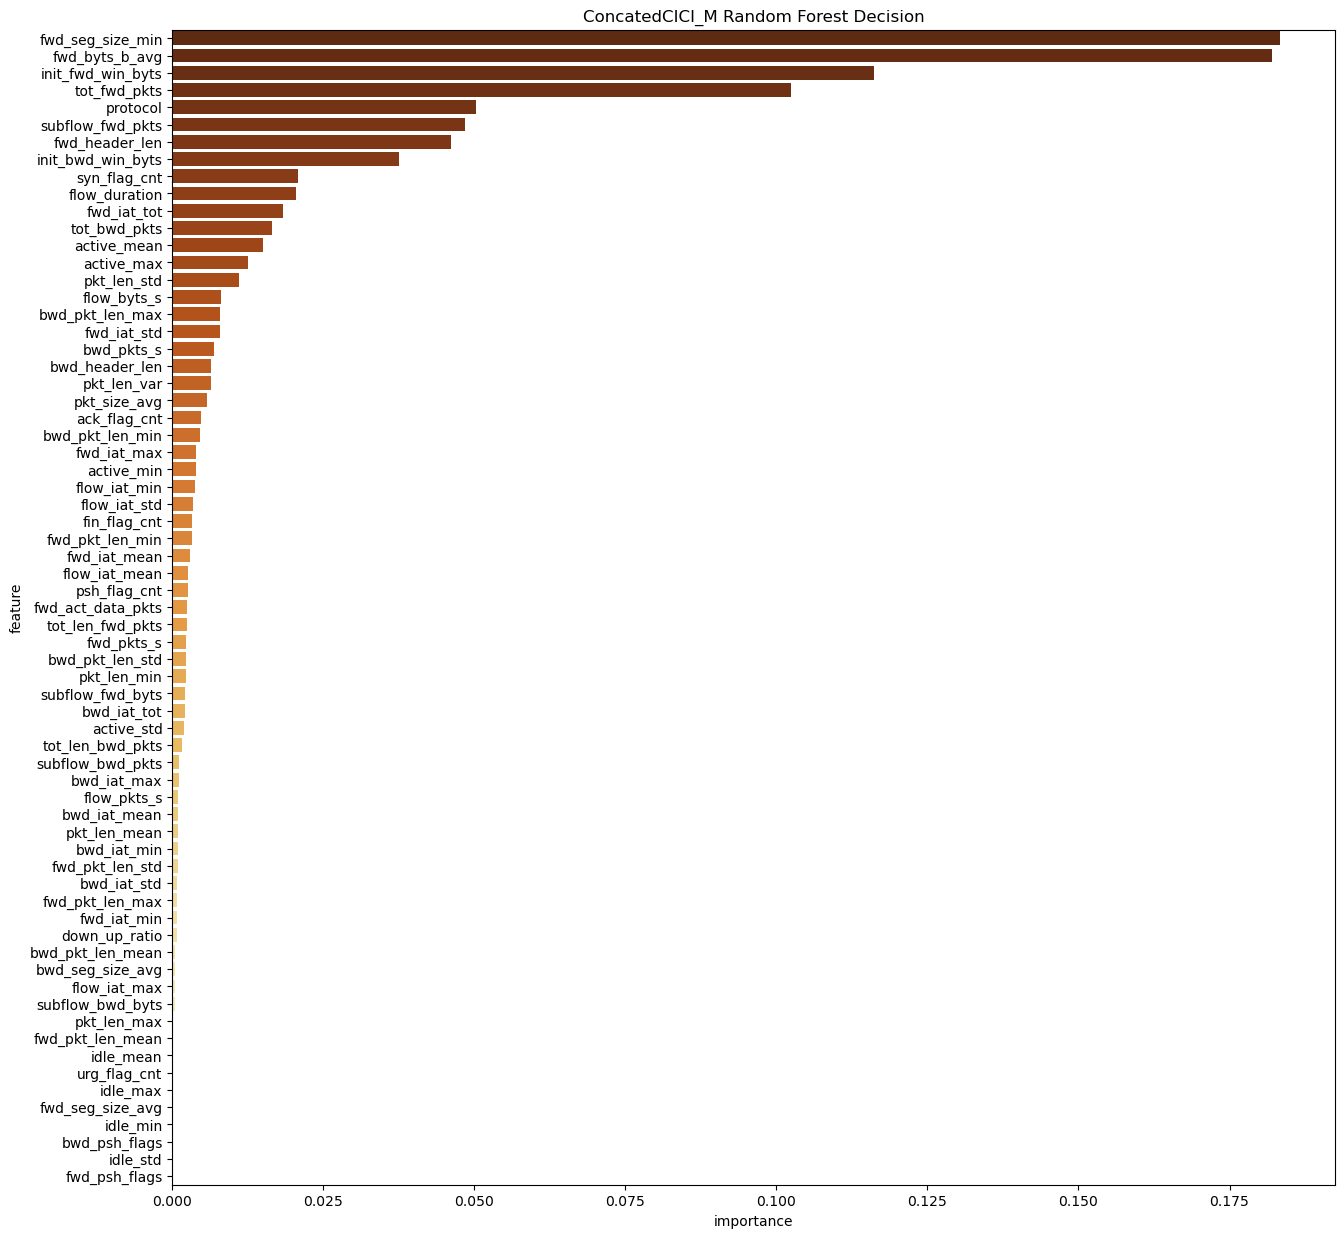

In [41]:
# ConcatedCICI_M

del ConcatedCICI_M['label']
del ConcatedCICI_M['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedCICI_M)
col = list(X_train.columns)

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('train finished')
start_time = time.time()
importances = rforest.feature_importances_
fi = list(importances)
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

rforest_importances = pd.Series(importances, index=feature_names)

zipp  = []
for zipper in zip(col, fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
zipp.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedCICI_M.csv')

# 0 값 삭제
val0idx = zipp[zipp['importance'] == 0].index
zipp.drop(val0idx, inplace=True)

plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='YlOrBr_r')
plt.title("ConcatedCICI_M Random Forest Decision")

train finished
Elapsed time to compute the importances: 0.010 seconds


Text(0.5, 1.0, 'ConcatedCICI_B Random Forest Decision')

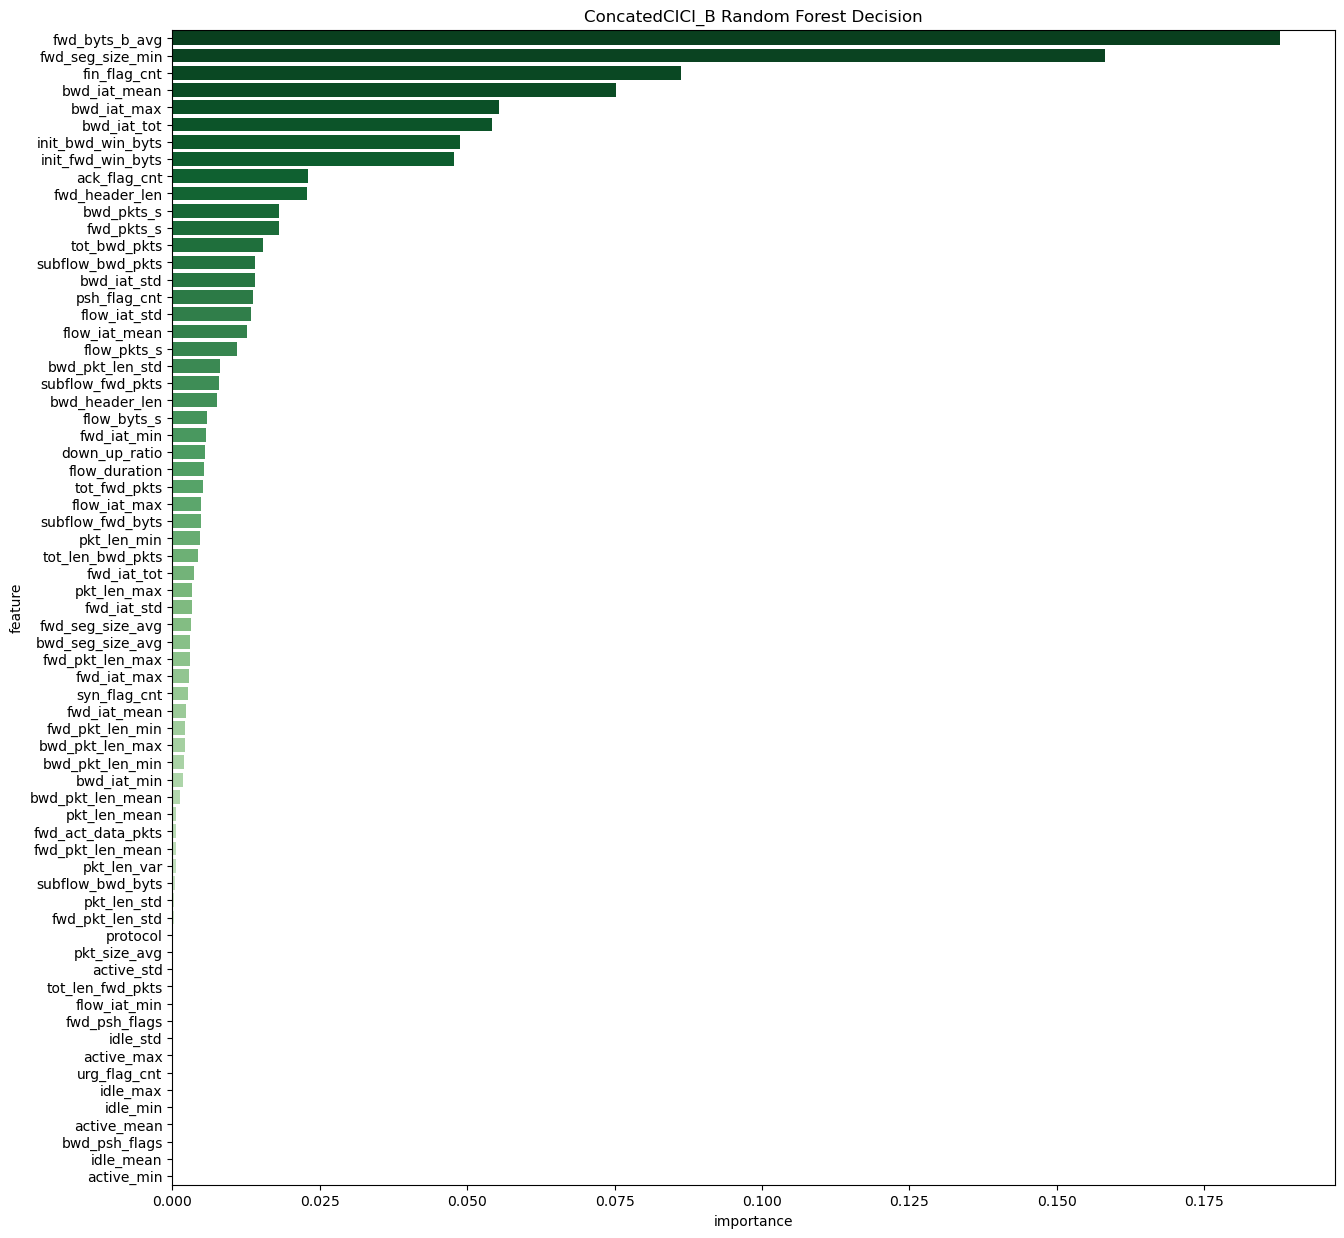

In [42]:
# ConcatedCICI_B

del ConcatedCICI_B['label']
del ConcatedCICI_B['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedCICI_B)
col = list(X_train.columns)

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('train finished')
start_time = time.time()
importances = rforest.feature_importances_
fi = list(importances)
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

rforest_importances = pd.Series(importances, index=feature_names)

zipp  = []
for zipper in zip(col, fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
zipp.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedCICI_B.csv')

# 0 값 삭제
val0idx = zipp[zipp['importance'] == 0].index
zipp.drop(val0idx, inplace=True)

plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='Greens_r')
plt.title("ConcatedCICI_B Random Forest Decision")

### UNSW

train finished
Elapsed time to compute the importances: 0.010 seconds


Text(0.5, 1.0, 'ConcatedUNSW Random Forest Decision')

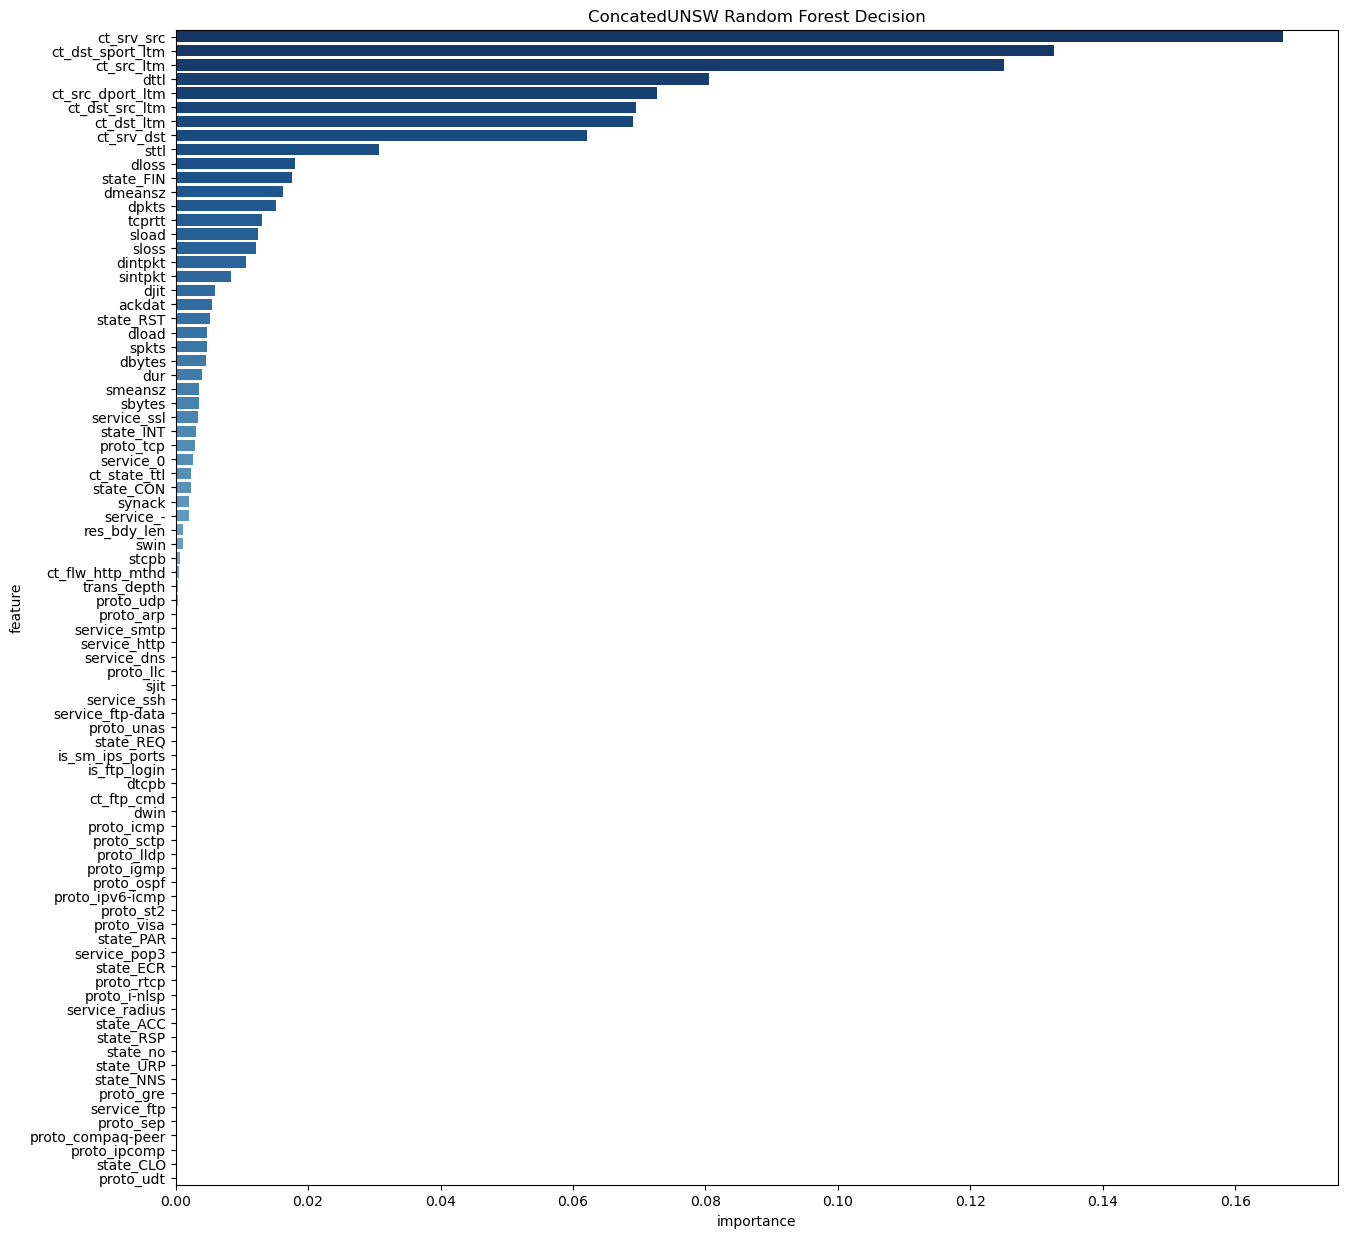

In [43]:
# ConcatedUNSW

del ConcatedUNSW['label']
del ConcatedUNSW['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedUNSW)
col = list(X_train.columns)

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('train finished')
start_time = time.time()
importances = rforest.feature_importances_
fi = list(importances)
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

rforest_importances = pd.Series(importances, index=feature_names)

zipp  = []
for zipper in zip(col, fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
zipp.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedUNSW.csv')

# 0 값 삭제
val0idx = zipp[zipp['importance'] == 0].index
zipp.drop(val0idx, inplace=True)

plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='Blues_r')
plt.title("ConcatedUNSW Random Forest Decision")

train finished
Elapsed time to compute the importances: 0.009 seconds


Text(0.5, 1.0, 'ConcatedUNSW_M Random Forest Decision')

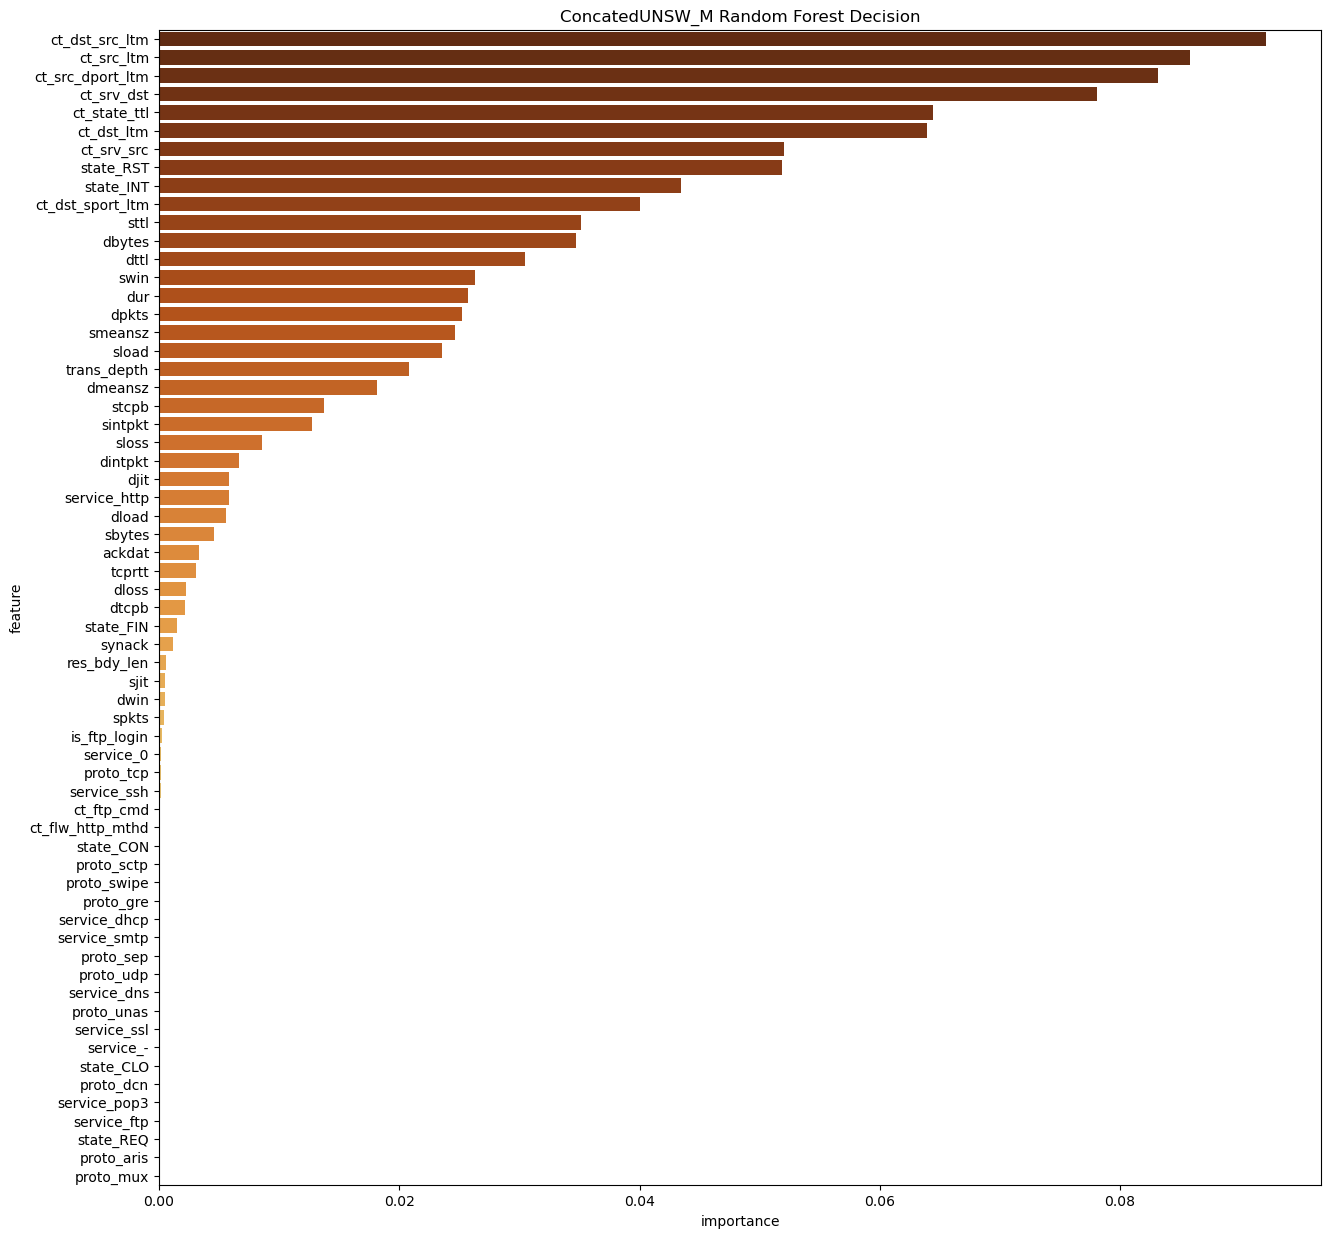

In [44]:
# ConcatedUNSW_M

del ConcatedUNSW_M['label']
del ConcatedUNSW_M['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedUNSW_M)
col = list(X_train.columns)

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('train finished')
start_time = time.time()
importances = rforest.feature_importances_
fi = list(importances)
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

rforest_importances = pd.Series(importances, index=feature_names)

zipp  = []
for zipper in zip(col, fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
zipp.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedUNSW_M.csv')

# 0 값 삭제
val0idx = zipp[zipp['importance'] == 0].index
zipp.drop(val0idx, inplace=True)

plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='YlOrBr_r')
plt.title("ConcatedUNSW_M Random Forest Decision")

train finished
Elapsed time to compute the importances: 0.009 seconds


Text(0.5, 1.0, 'ConcatedUNSW_B Random Forest Decision')

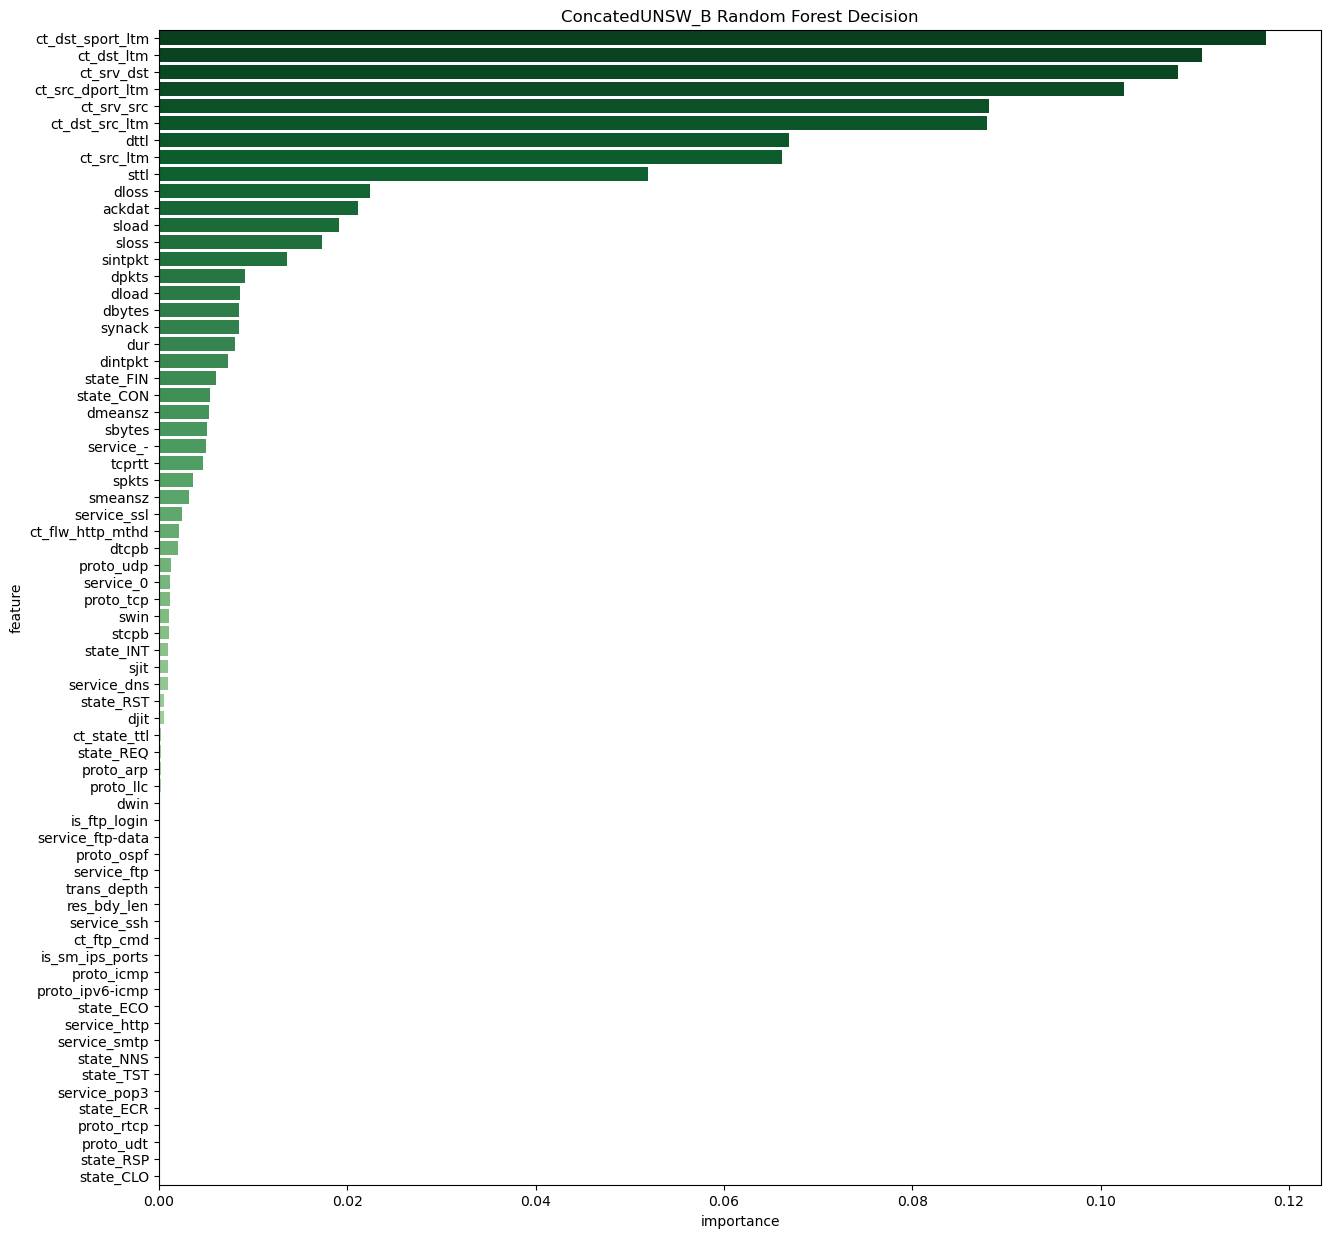

In [45]:
# ConcatedUNSW_B

del ConcatedUNSW_B['label']
del ConcatedUNSW_B['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedUNSW_B)
col = list(X_train.columns)

feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('train finished')
start_time = time.time()
importances = rforest.feature_importances_
fi = list(importances)
std = np.std([tree.feature_importances_ for tree in rforest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

rforest_importances = pd.Series(importances, index=feature_names)

zipp  = []
for zipper in zip(col, fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
zipp.to_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedUNSW_B.csv')

# 0 값 삭제
val0idx = zipp[zipp['importance'] == 0].index
zipp.drop(val0idx, inplace=True)

plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='Greens_r')
plt.title("ConcatedUNSW_B Random Forest Decision")

## 각 데이터 Format에 따라 상위 N개의 important feature 중 겹치는 것 추리기

In [46]:
ConcatedCICI_fi = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedCICI.csv')
ConcatedCICI_B_fi = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedCICI_B.csv')
ConcatedCICI_M_fi = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/2023-1/MLAC/Workspace/230414/importance/ConcatedCICI_M.csv')

In [ ]:
ConcatedCICI_fi_top5 = ConcatedCICI_fi[:5]
ConcatedCICI_B_fi_top5 = ConcatedCICI_B_fi[:5]
ConcatedCICI_M_fi_top5 = ConcatedCICI_M_fi[:5]

In [ ]:
ConcatedCICI_fi_top10 = ConcatedCICI_fi[:10]
ConcatedCICI_B_fi_top10 = ConcatedCICI_B_fi[:10]
ConcatedCICI_M_fi_top10 = ConcatedCICI_M_fi[:10]

In [53]:
ConcatedCICI_fi_top20 = ConcatedCICI_fi[:20]
ConcatedCICI_B_fi_top20 = ConcatedCICI_B_fi[:20]
ConcatedCICI_M_fi_top20 = ConcatedCICI_M_fi[:20]

## 정확도

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [58]:
# ConcatedCICI

del ConcatedCICI['label']
del ConcatedCICI['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedCICI)

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

prediction = rforest.predict(X_test)
# 지표 추출
print('Model\tAcc\tF1\tRecall\tPrecision')

acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
recall = recall_score(y_test, prediction)
precision = precision_score(y_test, prediction)

print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} secs'.format(acc, f1, recall, precision))

Model	Acc	F1	Recall	Precision


NameError: name 'accuracy_score' is not defined

In [ ]:
# ConcatedCICI_M

del ConcatedCICI_M['label']
del ConcatedCICI_M['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedCICI_M)

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

prediction = rforest.predict(X_test)
# 지표 추출
print('Model\tAcc\tF1\tRecall\tPrecision')

acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
recall = recall_score(y_test, prediction)
precision = precision_score(y_test, prediction)

print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} secs'.format(acc, f1, recall, precision))

In [ ]:
# ConcatedCICI_B

del ConcatedCICI_B['label']
del ConcatedCICI_B['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedCICI_B)

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

prediction = rforest.predict(X_test)
# 지표 추출
print('Model\tAcc\tF1\tRecall\tPrecision')

acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
recall = recall_score(y_test, prediction)
precision = precision_score(y_test, prediction)

print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} secs'.format(acc, f1, recall, precision))

In [ ]:
# ConcatedUNSW

del ConcatedUNSW['label']
del ConcatedUNSW['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedUNSW)

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

prediction = rforest.predict(X_test)
# 지표 추출
print('Model\tAcc\tF1\tRecall\tPrecision')

acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
recall = recall_score(y_test, prediction)
precision = precision_score(y_test, prediction)

print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} secs'.format(acc, f1, recall, precision))

In [ ]:
# ConcatedUNSW_M

del ConcatedUNSW_M['label']
del ConcatedUNSW_M['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedUNSW_M)

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

prediction = rforest.predict(X_test)
# 지표 추출
print('Model\tAcc\tF1\tRecall\tPrecision')

acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
recall = recall_score(y_test, prediction)
precision = precision_score(y_test, prediction)

print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} secs'.format(acc, f1, recall, precision))

In [ ]:
# ConcatedUNSW_B

del ConcatedUNSW_B['label']
del ConcatedUNSW_B['attack_category']

X_train, X_test, y_train, y_test = util.TrainTestSplit(ConcatedUNSW_B)

rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)

prediction = rforest.predict(X_test)
# 지표 추출
print('Model\tAcc\tF1\tRecall\tPrecision')

acc = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
recall = recall_score(y_test, prediction)
precision = precision_score(y_test, prediction)

print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f} secs'.format(acc, f1, recall, precision))